In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("bvmcancer.csv")
dataset.drop(dataset.columns[[32]],axis=1,inplace=True)
np.random.seed(55)
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [2]:
x=dataset.iloc[:,2:]
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [3]:
x=dataset.iloc[:,2:].values
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [4]:
y=dataset.iloc[:,1]
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf=tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

[Text(0.5875, 0.9285714285714286, 'X[27] <= 0.136\ngini = 0.46\nsamples = 398\nvalue = [255, 143]'),
 Text(0.425, 0.7857142857142857, 'X[23] <= 957.45\ngini = 0.129\nsamples = 260\nvalue = [242, 18]'),
 Text(0.375, 0.6428571428571429, 'X[13] <= 42.19\ngini = 0.047\nsamples = 248\nvalue = [242, 6]'),
 Text(0.25, 0.5, 'X[21] <= 33.27\ngini = 0.025\nsamples = 240\nvalue = [237, 3]'),
 Text(0.15, 0.35714285714285715, 'X[14] <= 0.003\ngini = 0.009\nsamples = 226\nvalue = [225, 1]'),
 Text(0.1, 0.21428571428571427, 'X[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.05, 0.07142857142857142, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.15, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 219\nvalue = [219, 0]'),
 Text(0.35, 0.35714285714285715, 'X[27] <= 0.092\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.3, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.4, 0.

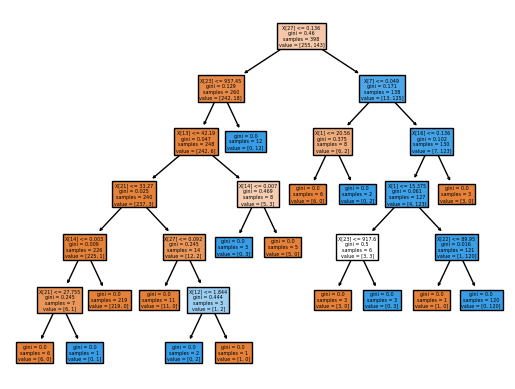

In [8]:
y_pred=clf.predict(x_test)
tree.plot_tree(clf,filled=True)

In [9]:
print(y_test)

[1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0]


In [10]:
from sklearn.metrics import confusion_matrix
results=confusion_matrix(y_test,y_pred)

In [11]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
print("Confusion Matrix")
print(results) 
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[93  9]
 [ 3 66]]
Accuracy Score :
0.9298245614035088
Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       102
           1       0.88      0.96      0.92        69

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [5]:
import csv

# Define the labels and their corresponding ranges
labels = {
    'Depression': [(0, 4.5, 'Normal'), (5, 6.5, 'Mild'), (7, 10, 'Moderate'), (10.5, 13.5, 'Severe'), (14, float('inf'), 'Extremely Severe')],
    'Anxiety': [(0, 3.5, 'Normal'), (4, 4.5, 'Mild'), (5, 7, 'Moderate'), (7.5, 9.5, 'Severe'), (10, float('inf'), 'Extremely Severe')],
    'Stress': [(0, 7, 'Normal'), (7.5, 9, 'Mild'), (9.5, 14.5, 'Moderate'), (13, 16.5, 'Severe'), (17, float('inf'), 'Extremely Severe')]
}

# Generate all possible combinations of 'D', 'A', and 'S' ranging from 0 to 21
combinations = [(d, a, s) for d in range(22) for a in range(22) for s in range(22)]

# Create a CSV file and write the header
with open('mental_health_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['D', 'A', 'S', 'Depression', 'Anxiety', 'Stress']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Write the data rows
    for d, a, s in combinations:
        row = {'D': d, 'A': a, 'S': s}
        for label, ranges in labels.items():
            for min_range, max_range, value in ranges:
                if min_range <= row[label] <= max_range:
                    row[label] = value
                    break
        writer.writerow(row)

print("CSV file 'mental_health_data.csv' has been created successfully.")


KeyError: 'Depression'

In [6]:
import csv

# Define the labels and their corresponding ranges
labels = {
    'Depression': [(0, 4.5, 'Normal'), (5, 6.5, 'Mild'), (7, 10, 'Moderate'), (10.5, 13.5, 'Severe'), (14, float('inf'), 'Extremely Severe')],
    'Anxiety': [(0, 3.5, 'Normal'), (4, 4.5, 'Mild'), (5, 7, 'Moderate'), (7.5, 9.5, 'Severe'), (10, float('inf'), 'Extremely Severe')],
    'Stress': [(0, 7, 'Normal'), (7.5, 9, 'Mild'), (9.5, 14.5, 'Moderate'), (13, 16.5, 'Severe'), (17, float('inf'), 'Extremely Severe')]
}

# Generate all possible combinations of 'D', 'A', and 'S' ranging from 0 to 21
combinations = [(d, a, s) for d in range(22) for a in range(22) for s in range(22)]

# Create a CSV file and write the header
with open('mental_health_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['D', 'A', 'S', 'Depression', 'Anxiety', 'Stress']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Write the data rows
    for d, a, s in combinations:
        row = {'D': d, 'A': a, 'S': s}
        for label, ranges in labels.items():
            for min_range, max_range, value in ranges:
                if min_range <= max(d, a, s) <= max_range:
                    row[label] = value
                    break
        writer.writerow(row)

print("CSV file 'mental_health_data.csv' has been created successfully.")

CSV file 'mental_health_data.csv' has been created successfully.


In [8]:
import csv

# Function to label the mental health categories
def label_mental_health(value, label_ranges):
    for min_range, max_range, label in label_ranges:
        if min_range <= value <= max_range:
            return label
    return None

# Define the labels and their corresponding ranges
depression_labels = [(0, 4.5, 'Normal'), (5, 6.5, 'Mild'), (7, 10, 'Moderate'), (10.5, 13.5, 'Severe'), (14, float('inf'), 'Extremely Severe')]
anxiety_labels = [(0, 3.5, 'Normal'), (4, 4.5, 'Mild'), (5, 7, 'Moderate'), (7.5, 9.5, 'Severe'), (10, float('inf'), 'Extremely Severe')]
stress_labels = [(0, 7, 'Normal'), (7.5, 9, 'Mild'), (9.5, 14.5, 'Moderate'), (13, 16.5, 'Severe'), (17, float('inf'), 'Extremely Severe')]

# Generate all possible combinations of 'D', 'A', and 'S' ranging from 0 to 21
combinations = [(d, a, s) for d in range(22) for a in range(22) for s in range(22)]

# Create a CSV file and write the header
with open('mental_health_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['D', 'A', 'S', 'Depression', 'Anxiety', 'Stress']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Write the data rows
    for d, a, s in combinations:
        row = {
            'D': d,
            'A': a,
            'S': s,
            'Depression': label_mental_health(d, depression_labels),
            'Anxiety': label_mental_health(a, anxiety_labels),
            'Stress': label_mental_health(s, stress_labels)
        }
        writer.writerow(row)

print("CSV file 'mental_health_data.csv' has been created successfully.")


CSV file 'mental_health_data.csv' has been created successfully.
